In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# import standard python packages
import sys
import numpy as np
# import basemap
from mpl_toolkits.basemap import Basemap
# import FESOM packages
sys.path.append("./modules/")
from load_mesh_data import *
#sys.path.append("/home/h/hbkdsido/utils/seawater-1.1/")
import seawater as sw
%matplotlib notebook
from fesom_plot_tools import *
import cmocean.cm as cmo
import matplotlib 
fontsize=20
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize) 

## read the mesh

In [3]:
# set the path to the mesh
#meshpath  ='/home/ollie/nkolduno/meshes/pi-grid/'
meshpath  ='/scratch/users/nkolduno/DATA/FESOM/meshes/FESOM2/mesh_CORE2_final'
#meshpath  ='/work/ollie/ogurses/NATMAP/mesh_F2GLO08/'
alpha, beta, gamma=[50, 15, -90]
#alpha, beta, gamma=[0, 0, 0]
try:
	mesh
except NameError:
	print("mesh will be loaded")
	mesh=load_mesh(meshpath, abg=[alpha, beta, gamma], usepickle = False, usejoblib=True)
else:
	print("mesh with this name already exists and will not be loaded")

mesh will be loaded
The usejoblib == True)
The joblib file for FESOM2 exists.
The mesh will be loaded from /scratch/users/nkolduno/DATA/FESOM/meshes/FESOM2/mesh_CORE2_final/joblib_mesh_fesom2


## Cut small portion of the mesh

Fol large meshes plotting on original mesh can be very slow, so it make sence to cut only small portion of the mesh that you would like to use for plotting. Also useful for calculation of mean properties over lon/lat boxes.

In [17]:
# load file with scalar field
fl = Dataset('/scratch/users/nkolduno/DATA/FESOM/results/FESOM2/test/temp.fesom.1948.nc')
# load file with additional mesh information
ncfile  = Dataset('/scratch/users/nkolduno/DATA/FESOM/results/FESOM2/test/fesom.mesh.diag.nc')

In [18]:
# load additional mesh information (number of levels for each of the elements)
nlevels =ncfile.variables['nlevels'][:]
# define depth you would like to select
depth = 30
# find the model depth index that is closest to the required depth
dind = ind_for_depth(depth, mesh)
# get the data for depth (closest to required)
temp = fl.variables['temp'][0,:,dind]
# cut the region
elem_no_nan, no_nan_triangles = cut_region(mesh=mesh, nlevels=nlevels, box=[-5, 30, 50,60], depth=depth)

Create instance of the Basemap that is slightly larget than required box:

In [20]:
m = Basemap(projection='merc',llcrnrlat=49,urcrnrlat=61,\
            llcrnrlon=-7,urcrnrlon=35,lat_ts=20,resolution='l')

x, y = m(mesh.x2, mesh.y2)

<IPython.core.display.Javascript object>


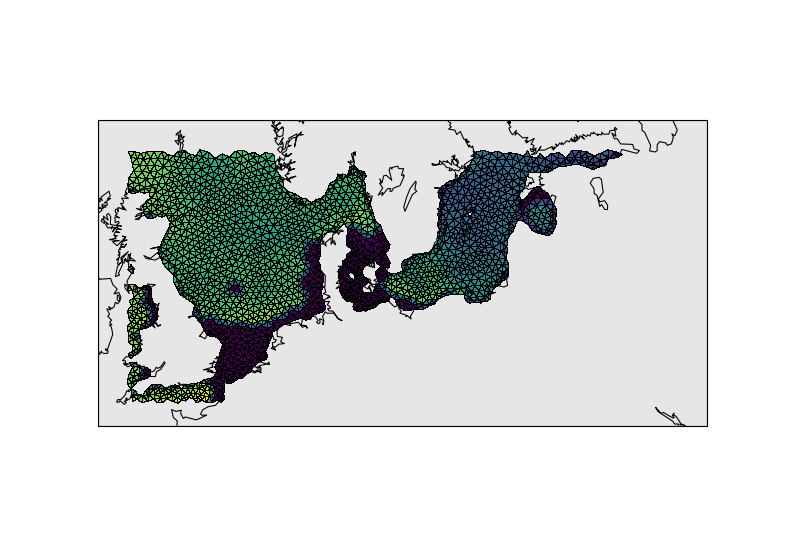

In [21]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
# plt.tricontourf(x, y, elem_no_nan, temp,lw=0.2,color='k');
# plt.triplot(x, y, elem_no_nan, lw=0.2,color='k');
plt.tripcolor(x, y, elem_no_nan, temp,  lw=0.01,color='k');
# plt.colorbar(orientation='horizontal', pad=0.03)